<a href="https://colab.research.google.com/github/bharani018/Movie_review_system/blob/main/Movie_Review_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer




df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

def preprocess_review(review):
    cleaned_review = clean_text(review)
    processed_review = remove_stopwords(cleaned_review)

    return processed_review

df['cleaned_review'] = df['review'].apply(preprocess_review)

def perform_stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

# Apply stemming to the cleaned reviews
df['stemmed_review'] = df['cleaned_review'].apply(perform_stemming)

df.to_csv('preprocessed_movie_reviews.csv', index=False)






<ipython-input-3-ed18d1495221>:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [ ]:


from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(train_vectors, train_labels)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions = model.predict(test_vectors)

accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(test_labels, predictions))

print('Confusion Matrix:')
print(confusion_matrix(test_labels, predictions))



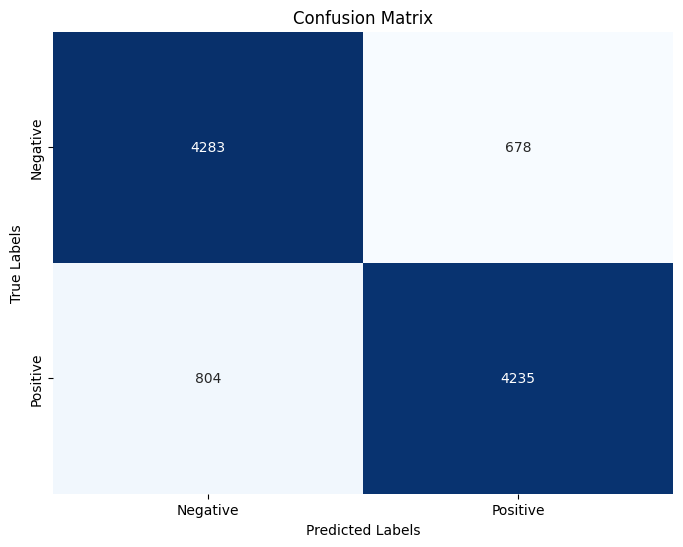

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the preprocessed data
df = pd.read_csv('preprocessed_movie_reviews.csv')

def clean_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

def preprocess_review(review):
    cleaned_review = clean_text(review)
    processed_review = remove_stopwords(cleaned_review)
    return processed_review

def perform_stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing steps to user input
user_input = input("Enter a movie review: ")
user_input_cleaned = preprocess_review(user_input)
user_input_stemmed = perform_stemming(user_input_cleaned)

# Load the trained vectorizer
loaded_vectorizer = TfidfVectorizer(max_features=5000)
loaded_vectorizer.fit(df['cleaned_review'])

# Transform user input using the loaded vectorizer
user_input_vectorized = loaded_vectorizer.transform([user_input_stemmed])

# Load the trained model
loaded_model = RandomForestClassifier(n_estimators=100, random_state=42)
loaded_model.fit(loaded_vectorizer.transform(df['cleaned_review']), df['sentiment'])

# Make prediction
user_prediction = loaded_model.predict(user_input_vectorized)
print(f'Predicted Sentiment: {user_prediction[0]}')


Enter a movie review: the worst i have ever seen
Predicted Sentiment: negative
